In [17]:
import numpy as np

def getChoice(V,e): #εグリーディで行動選択
    idx=np.argmax(V)#最大値のインデックスを返す
    if np.random.rand()<e or V[idx]==-1: #Vの最大値が-1の時は全部のVが-1
        k=np.random.randint(0,4)#ランダムに選ぶ
        return act[k]
    else:
        return act[idx] #最大の価値を持つ選択肢

act=["up","down","left","right"]
Qtable=np.zeros((4,4,4))#価値を入れるいれもの

alpha=0.1
gamma=0.99
e=0.1
ite=50 #繰り返し回数
reward=np.zeros(ite)#総得点を記録
episode=np.zeros(ite)#何回でゴールまで行ったか記録


for i in range(ite):
    current=[0,0]#スタート位置
    goal=0
    r=0
    while goal==0:#ゴールしてなければ
        #print(current)
        a=getChoice(Qtable[current[0],current[1],:],e)
        #print("a: ",a)
        pre=current.copy() #動く前の位置をおぼえておく。かならずcopy()
        if a==act[0]:
            if current[0]!=0:#端でなければ
                current[0]-=1#ひとつ動く
            t=0
        elif a==act[1]:
            if current[0]!=3:
                current[0]+=1
            t=1
        elif a==act[2]:
            if current[1]!=0:
                current[1]-=1
            t=2
        else:
            if current[1]!=3:
                current[1]+=1
            t=3
        r=-1 #一回につき-1
        
        if current==[3,3]:
            goal=1 #ゴールした
            r+=101
            
        Qtable[pre[0],pre[1],t]=Qtable[pre[0],pre[1],t]+alpha*(r+gamma*np.max(Qtable[current[0],current[1],:])-Qtable[pre[0],pre[1],t])#ここで学習
        
        reward[i]+=r
        episode[i]+=1
        
    print("goalしました。",i) 

goalしました。 0
goalしました。 1
goalしました。 2
goalしました。 3
goalしました。 4
goalしました。 5
goalしました。 6
goalしました。 7
goalしました。 8
goalしました。 9
goalしました。 10
goalしました。 11
goalしました。 12
goalしました。 13
goalしました。 14
goalしました。 15
goalしました。 16
goalしました。 17
goalしました。 18
goalしました。 19
goalしました。 20
goalしました。 21
goalしました。 22
goalしました。 23
goalしました。 24
goalしました。 25
goalしました。 26
goalしました。 27
goalしました。 28
goalしました。 29
goalしました。 30
goalしました。 31
goalしました。 32
goalしました。 33
goalしました。 34
goalしました。 35
goalしました。 36
goalしました。 37
goalしました。 38
goalしました。 39
goalしました。 40
goalしました。 41
goalしました。 42
goalしました。 43
goalしました。 44
goalしました。 45
goalしました。 46
goalしました。 47
goalしました。 48
goalしました。 49


In [18]:
Qvalue=np.max(Qtable,axis=2) # 状態価値の最終状態
print(Qvalue)

[[ 2.39330473e+01  5.54166706e+00  4.63540177e+00 -2.50210000e-02]
 [ 4.32766657e+01  6.36300451e+01  8.17234100e+01  2.50100000e+00]
 [-3.46029732e-01  2.92983256e+01  9.35645362e+01  2.71000000e+01]
 [-1.30069900e-01  7.23557069e+00  9.92930350e+01  0.00000000e+00]]


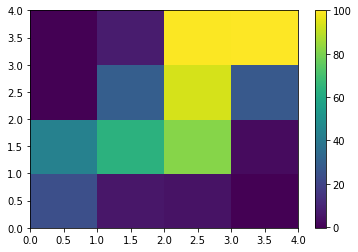

In [19]:
import matplotlib.pyplot as plt
Qvalue[3,3]=100 #ゴールの価値は更新されてないので100を入れておく。必須ではない。
plt.pcolor(Qvalue)
plt.colorbar()

[95. 10. 10.  8. 46.  6. 22.  9.  6. 13.  6. 15. 10.  8.  7. 13. 10. 10.
 10.  6.  6.  6.  6.  8.  6.  8.  7.  6.  9.  6.  6.  6.  6.  9.  6.  6.
  6.  8.  6.  6.  6.  8.  8.  6.  8.  6.  6.  6.  6.  8.]


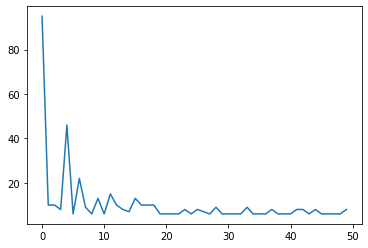

In [20]:
plt.plot(episode)
print(episode)

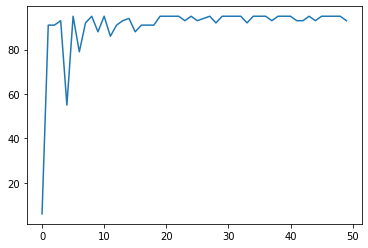

In [21]:
plt.plot(reward)